<a href="https://colab.research.google.com/github/bmounikareddy98/Machine-learning-assignments/blob/main/Multiple_linear_Regression(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor


**The dataset is imported from github public repository**

In [252]:
url = 'https://raw.githubusercontent.com/bmounikareddy98/Machine-learning-assignments/main/insurance.csv'
dataset = pd.read_csv(url)
dataset=dataset.dropna()
dataset = dataset.drop_duplicates()
print(dataset.head())

      sex smoker     region  children     bmi  age      charges
0  female    yes  southwest         0  27.900   19  16884.92400
1    male     no  southeast         1  33.770   18   1725.55230
2    male     no  southeast         3  33.000   28   4449.46200
3    male     no  northwest         0  22.705   33  21984.47061
4    male     no  northwest         0  28.880   32   3866.85520


**The dataset is divided into dependent variables array and an independent variable array.**

In [253]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
print(X.shape)
print(Y.shape)
print(X[5])
#print(Y[5])



(1337, 6)
(1337,)
['female' 'no' 'southeast' 0 25.74 31]


In [ ]:
Encode the categorical data

In [254]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 1]= labelencoder.fit_transform(X[:, 1])
X[:, 2]= labelencoder.fit_transform(X[:, 2])
print(X)

[[0 1 3 0 27.9 19]
 [1 0 2 1 33.77 18]
 [1 0 2 3 33.0 28]
 ...
 [0 0 2 0 36.85 18]
 [0 0 3 0 25.8 21]
 [0 1 1 0 29.07 61]]


In [255]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


print(X[1])
#print(X.shape)



[0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1 33.77 18]


In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [257]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1069, 11)
(1069,)
(268, 11)
(268,)


In [258]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:, 8:11] = sc.fit_transform(X_train[:, 8:11])
X_test[:, 8:11] = sc.transform(X_test[:, 8:11])
Y_train = Y_train.reshape(-1, 1)
Y_train = sc.fit_transform(Y_train)
Y_test = Y_test.reshape(-1, 1)
Y_test = sc.fit_transform(Y_test)
print(X_train[0])
print(X_test[0])
print(Y_train)
print(Y_train.shape)

[0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.5855501703442823 0.4141157157741812
 1.489406518534078]
[1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 -0.9205412028908647 1.3864435332426208
 0.34555087249183136]
[[ 0.02]
 [-0.05]
 [-0.34]
 ...
 [-0.98]
 [ 0.47]
 [ 2.88]]
(1069, 1)


**The null are checked in the dataset(there aren't any)**

In [156]:
print(dataset.isnull().sum())

sex         0
smoker      0
region      0
children    0
bmi         0
age         0
charges     0
dtype: int64


**The values of dependent variables are shown 

In [53]:
print(X[1])

[18 'male' 33.77 1 'no' 'southeast']


**The independent variable is shown below**

In [54]:
print(Y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


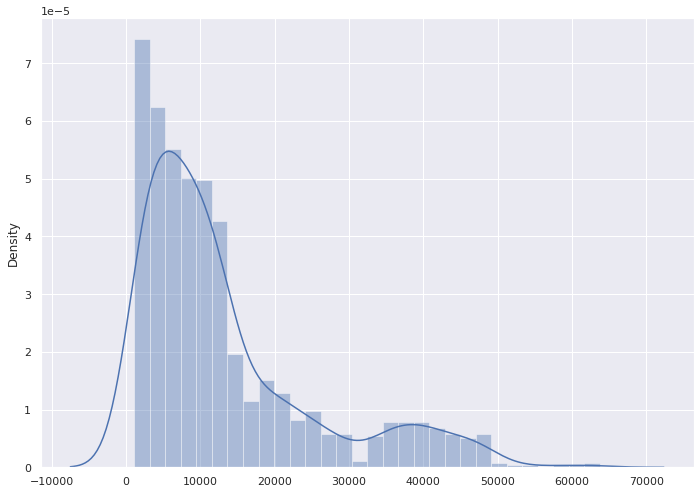

In [233]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()

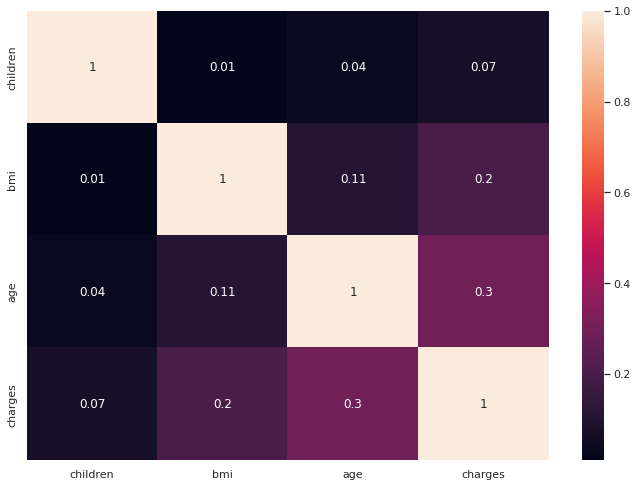

In [234]:
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [18]:
"""X= dataset[["age", "sex","bmi","smoker","region"]]"""

'X= dataset[["age", "sex","bmi","smoker","region"]]'

**Splitting the dataset into training and test sets**

In [259]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [260]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[ 1.86e+00  2.74e+00]
 [-7.81e-02 -4.58e-02]
 [ 3.42e-02  4.60e-04]
 [-1.54e-01 -5.46e-01]
 [-2.11e-01 -5.42e-01]
 [-9.17e-01 -7.62e-01]
 [-7.33e-01 -9.09e-01]
 [-9.52e-02  1.03e-01]
 [-2.92e-01 -3.80e-03]
 [ 1.68e+00  1.14e+00]
 [-2.66e-01  6.65e-02]
 [-7.39e-01 -4.59e-01]
 [-2.45e-01 -1.76e-01]
 [-3.55e-01 -2.44e-01]
 [-8.72e-01 -9.44e-01]
 [-2.29e-02  1.30e-01]
 [-8.55e-01  8.89e-01]
 [ 1.54e+00  2.36e+00]
 [ 2.27e-01  6.79e-02]
 [ 1.76e-01  2.89e-01]
 [-6.03e-01 -6.61e-01]
 [ 4.07e-01  1.05e-01]
 [-3.75e-01 -3.38e-01]
 [-2.85e-01 -3.90e-01]
 [-5.47e-01 -6.54e-01]
 [ 1.78e+00  2.70e+00]
 [-3.31e-01 -2.87e-01]
 [ 2.18e+00  3.17e+00]
 [-6.20e-01 -5.70e-01]
 [-8.00e-01 -7.23e-01]
 [ 1.74e-01 -1.82e-01]
 [-8.00e-01 -7.14e-01]
 [-7.73e-01 -6.62e-01]
 [-2.42e-01 -3.11e-02]
 [-9.20e-01 -9.01e-01]
 [-7.56e-01  1.39e+00]
 [ 1.36e+00  2.19e+00]
 [-2.28e-01  1.11e+00]
 [-9.52e-02 -5.30e-01]
 [-2.07e-01 -2.33e-01]
 [ 1.70e+00  1.14e+00]
 [-1.14e+00 -8.71e-01]
 [-2.29e-01  6.92e-01]
 [ 1.62e+00

In [261]:
y_train_predict = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

0.5013861298625156
0.7486119487814886


In [262]:
import sklearn.metrics
import math
y_test_predict=regressor.predict(X_test)
mse = sklearn.metrics.mean_squared_error(Y_test, y_test_predict)

rmse = math.sqrt(mse)
#rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2t = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2t)

0.5249847104636908
0.7243910537793549
